In [1]:
import sys
sys.path.append('../../../lib')
from tqdm import tqdm
from scipy.signal import fftconvolve
import numpy as np
import os
import matplotlib.pyplot as plt
from fast_detection_methods import trajectory_gauss, trajectory_mean, trajectory_corr, fit_gaussian, find_ideal_R,most_common_value
from movie_processing import movie_to_array, clean_problem_pixels
from Powerspectra import powerspectrum, fit_power_spectrum, plot_power_spectra, fast_analytical_noisy_powerspectrum
#from pipython.datarectools import getservotime
#core.set_exposure(0.5)##sets the cameras exposure time for snapshots to half a milisecond

In [ ]:
C:\Users\jschulz\Desktop\Spectral-Noise-Cleaning\SpectralMechanicsAnalysis

In [2]:
pip install -r ../../../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install git+https://github.com/wusche1/SpectralMechanicsAnalysis.git

^C
Note: you may need to restart the kernel to use updated packages.


  Cloning https://github.com/wusche1/SpectralMechanicsAnalysis.git to c:\users\jschulz\appdata\local\temp\pip-req-build-b8ix6k4p
  Resolved https://github.com/wusche1/SpectralMechanicsAnalysis.git to commit 233604cb9721910414093642081e80b3130983a9
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for SpectralMechanicsAnalysis: filename=SpectralMechanicsAnalysis-0.1.0-py3-none-any.whl size=12766 sha256=f7b68ea6ecd9bce5c7a5169921638abcf90d03feb9fd9d2481544ac8b77c5911
  Stored in directory: C:\Users\jschulz\AppData\Local\Temp\pip-ephem-wheel-cache-yha2wsfp\wheels\6f\d7\cd\10dba822cabc598fb679da

  Running command git clone --filter=blob:none --quiet https://github.com/wusche1/SpectralMechanicsAnalysis.git 'C:\Users\jschulz\AppData\Local\Temp\pip-req-build-b8ix6k4p'


In [2]:
from SpectralMechanicsAnalysis import Data, mean_back_realxation, mean_back_relaxation_multiple_trajectories, mean_back_relaxation_multiple_trajectories_with_timestamps, mean_back_relaxation_multiple_trajectories_with_timestamps

In [3]:
def trajectory_folders_from_datapath(datapath):
    list_of_subfolders = [f.path for f in os.scandir(datapath) if f.is_dir()]
    return [os.path.join(datapath,subfolder) for subfolder in list_of_subfolders]

data_path =r'\\134.76.13.158\betzlab\Julian\cell_beats\04_03_24\sample_2'
trajectory_folders = trajectory_folders_from_datapath(data_path)

In [4]:
file = trajectory_folders[0]
print(file)

\\134.76.13.158\betzlab\Julian\cell_beats\04_03_24\sample_2\2_khz_trajectories


In [5]:
tra_corr_1 = np.load(os.path.join(file,'tra_corr.npy'))
tra_mean_1 = np.load(os.path.join(file,'tra_mean.npy'))


In [6]:
def filter_too_big_steps(data,threshold = 0.1):
    differences = np.diff(data)
    filtered_differences = [dx if abs(dx) <threshold else 0 for dx in differences]
    return np.cumsum(filtered_differences)
    


In [7]:
dt = 1/2000
x_data = tra_mean_1[:,0]
y_data = tra_mean_1[:,1]
x_data = filter_too_big_steps(x_data)
y_data = filter_too_big_steps(y_data)
t_data = np.arange(0, len(x_data)*dt, dt)
x_dataset = Data(t_data, x_data, log_weighted = True, unweighted_postfit = True)
y_dataset = Data(t_data, y_data, log_weighted = True, unweighted_postfit = True)

In [ ]:
x_dataset = Data(t_data, x_data) # define dataset
x_dataset.bayesian_update() # find model and model parameters
x_dataset.find_peaks(max_iter=5) # find noise peaks
x_dataset.create_reconstructed_data() # recreate denoised data

denoised_x = x_dataset.reconstructed_x # get the denoised data
model_parameters = x_dataset.fit_params# get the model parameters
y_dataset.plot_psd() # plot the power spectral density with all fitted models


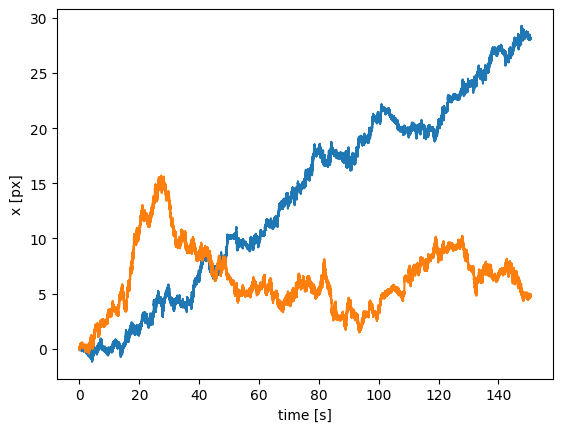

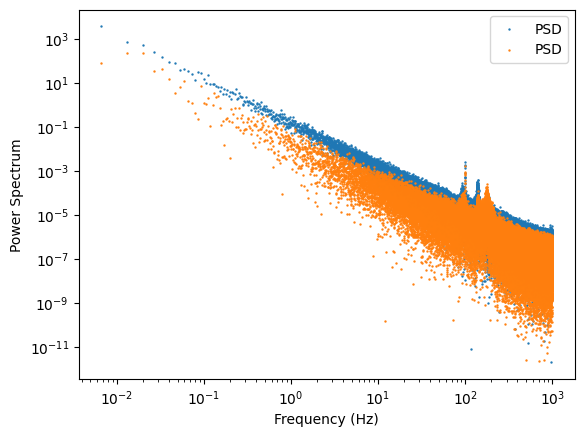

In [8]:
plt.plot(t_data, x_data)
plt.plot(t_data, y_data)
plt.xlabel('time [s]')
plt.ylabel('x [px]')
plt.show()
x_dataset.plot_psd()
y_dataset.plot_psd()

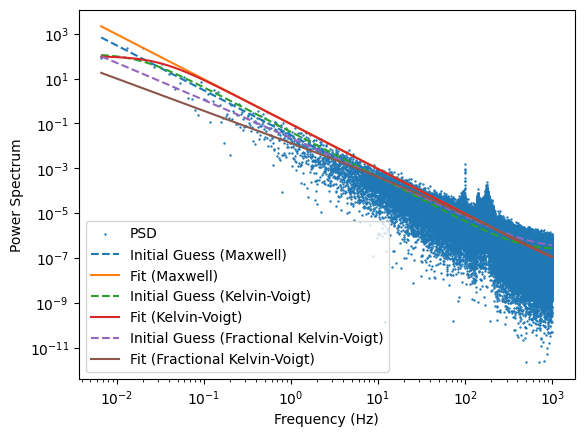

In [21]:
y_dataset.plot_psd()

In [9]:
len(x_data)

301380

In [10]:
x_dataset.bayesian_update()
y_dataset.bayesian_update()

c:\Users\jschulz\Desktop\Git_file\mbr_relevant_code\.venv\Lib\site-packages\SpectralMechanicsAnalysis\analyze_data.py:109: RuntimeWarning: invalid value encountered in log
  initial_guess = np.log(initial_guess)


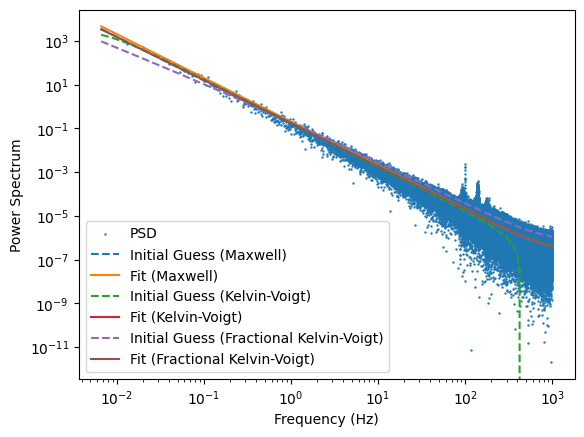

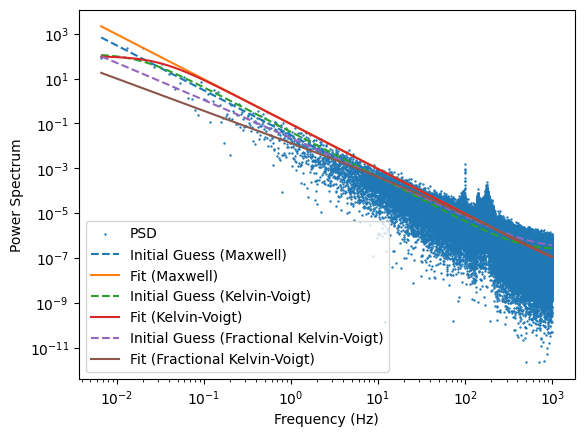

In [11]:
x_dataset.plot_psd()
plt.show()
y_dataset.plot_psd()
plt.show()


In [12]:

print("x_data")
print(f"posterior maxwell:{x_dataset.posterior_maxwell}")    
print(f"posterior kelvin voigt:{x_dataset.posterior_kelvin_voigt}")
print(f"posterior fractional kelvin voigt:{x_dataset.posterior_fractional_kelvin_voigt}")

print("y_data")
print(f"posterior maxwell:{y_dataset.posterior_maxwell}")
print(f"posterior kelvin voigt:{y_dataset.posterior_kelvin_voigt}")
print(f"posterior fractional kelvin voigt:{y_dataset.posterior_fractional_kelvin_voigt}")





x_data
posterior maxwell:nan
posterior kelvin voigt:nan
posterior fractional kelvin voigt:nan
y_data
posterior maxwell:0.0
posterior kelvin voigt:0.0
posterior fractional kelvin voigt:1.0


In [45]:
x_dataset.posterior_maxwell = 1.
x_dataset.posterior_kelvin_voigt = 0
x_dataset.posterior_fractional_kelvin_voigt = 0.

In [48]:
y_dataset.posterior_maxwell = 0.
y_dataset.posterior_kelvin_voigt = 0
y_dataset.posterior_fractional_kelvin_voigt = 1.



In [13]:
#x_dataset.peaks = []
#x_dataset.max_peak_percentage = 0.8
#x_dataset.find_peaks(max_iter=5)

y_dataset.peaks = []
y_dataset.max_peak_percentage = 0.1
y_dataset.find_peaks(max_iter=10)

In [51]:
#y_dataset.peaks=y_dataset.peaks[1:] 

In [14]:
#x_dataset.create_reconstructed_data()
y_dataset.create_reconstructed_data()

In [15]:
frequencies = x_dataset.frequencies
PSD = x_dataset.PSD
plt.scatter(frequencies, PSD, s=.7,c='r')
plt.scatter(frequencies, x_dataset.reconstructed_PSD, c='green', s=.7)
plt.plot(frequencies, x_dataset.fit_function(frequencies, x_dataset.fit_params), c='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.show()


AttributeError: 'Data' object has no attribute 'reconstructed_PSD'

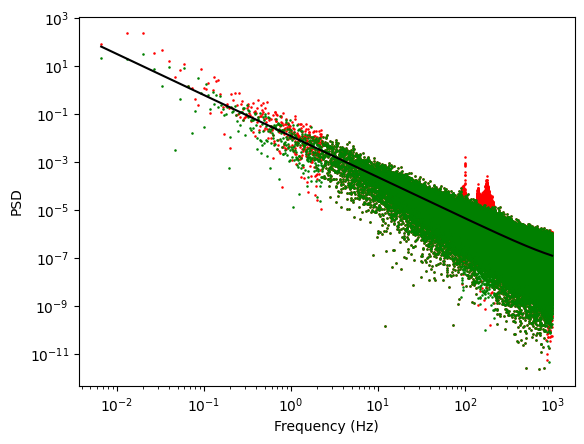

In [28]:
frequencies = y_dataset.frequencies
PSD = y_dataset.PSD
plt.scatter(frequencies, PSD, s=.7,c='r')
plt.scatter(frequencies, y_dataset.reconstructed_PSD, c='green', s=.7)
plt.plot(frequencies, y_dataset.fit_function(frequencies, y_dataset.fit_params), c='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.show()

In [30]:
y_dataset.fit_params

[1.3056182726112394e-09,
 154.80382971491892,
 0.5783907402102213,
 0.7120134642074534,
 3.73358764267261e-08]

In [35]:
154.80/293

0.5283276450511946

In [17]:
y_dataset.fit_fractional_kelvin_voigt

[93.81614812119467,
 21.48831675330924,
 0.4349593567814155,
 0.9559390669261566,
 2.275683469538058e-10]

In [33]:
Tau_list = dt*np.array([1,2,5,10,20,50,100,200,500]) 
T_MBR = dt *100*20
multiplier = 1.
t_mbr = np.arange(0, T_MBR, dt)
cleaned_mbr_list = []
original_mbr_list = []
for Tau in Tau_list:
    cleaned_mbr = mean_back_realxation(dt,y_dataset.reconstructed_x, Tau, T_MBR, multiplier = multiplier)
    original_mbr = mean_back_realxation(dt,y_data, Tau, T_MBR, multiplier = multiplier)
    cleaned_mbr_list.append(cleaned_mbr)
    original_mbr_list.append(original_mbr)
#mbr = mean_back_realxation(dt,x_data, Tau, T_MBR, multiplier = multiplier)
#cleaned_mbr =mean_back_realxation(dt,x_dataset.reconstructed_x, Tau, T_MBR, multiplier = multiplier)

100%|██████████| 80889/80889 [00:00<00:00, 184397.95it/s]


In [1]:
#colors go from red to black
colors = plt.cm.Reds(np.linspace(.20, 1, len(Tau_list)))[::-1]
for tau, mbr,c in zip(Tau_list, cleaned_mbr_list,colors):
    t_mbr = np.arange(0, len(mbr)*dt, dt)
    plt.plot(t_mbr, mbr, label = f'Tau = {tau} s', c=c)
plt.plot(t_mbr, np.ones_like(t_mbr)*.5, label = 'passive state')
#place legent lower right

plt.legend(loc='lower right')
plt.xlabel('time [s]')
plt.ylabel('mean back relaxation')
plt.show()


NameError: name 'plt' is not defined

In [20]:
colors = plt.cm.viridis(np.linspace(0,1,len(Tau_list)))
for tau, mbr in zip(Tau_list, cleaned_mbr_list):
    t_mbr = np.arange(0, len(mbr)*dt, dt)
    plt.plot(t_mbr, mbr, label = f'Tau = {tau} s')
plt.plot(t_mbr, np.ones_like(t_mbr)*.5, label = 'passive state')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('mean back relaxation')
plt.show()


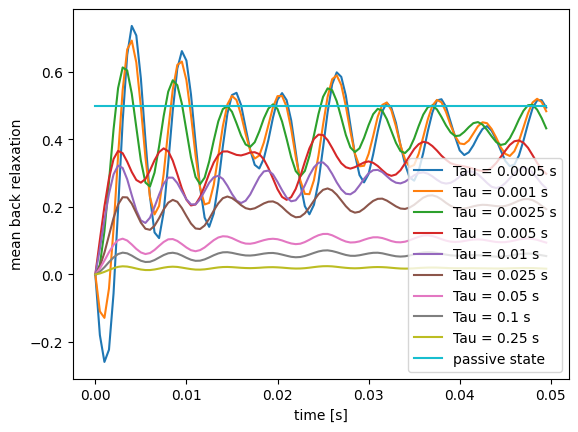

In [70]:
for tau, mbr in zip(Tau_list, original_mbr_list):

    t_mbr = np.arange(0, len(mbr)*dt, dt)
    plt.plot(t_mbr, mbr, label = f'Tau = {tau} s')
plt.plot(t_mbr, np.ones_like(t_mbr)*.5, label = 'passive state')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('mean back relaxation')
plt.show()

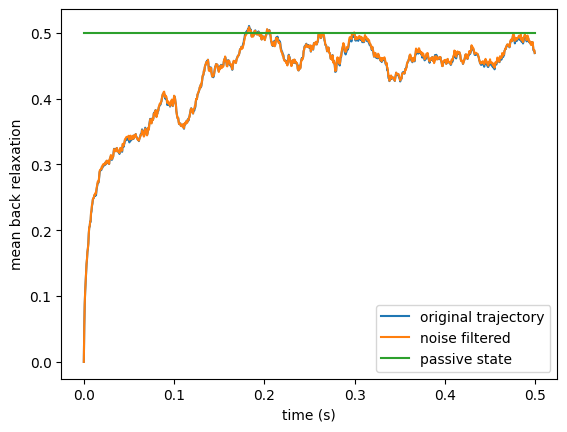

In [44]:
plt.plot(t_mbr, mbr, label = 'original trajectory')
plt.plot(t_mbr, cleaned_mbr, label = 'noise filtered')
plt.plot(t_mbr, np.ones_like(t_mbr)*.5, label = 'passive state')
plt.xlabel('time (s)')
plt.ylabel('mean back relaxation')
plt.legend()
plt.show()

In [1]:
np.min(PSD[:0])

NameError: name 'np' is not defined

In [99]:
PSD
min_PSD_up_to = np.minimum.accumulate(PSD)

In [107]:
p = 0.01
def calculate_x_p(p,x_l):
    n = np.arange(1, len(x_l)+1)
    return (2*(p)**3-1)*x_l

x_p = calculate_x_p(p,min_PSD_up_to)

In [108]:
plt.scatter(frequencies,PSD, s=.5, c='b')
plt.plot(frequencies, min_PSD_up_to, c='r')
plt.plot(frequencies, x_p, c='g')
plt.xscale('log')
plt.yscale('log')